In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import os

NAB Data Corpus
---

Data are ordered, timestamped, single-valued metrics. All data files contain anomalies, unless otherwise noted.


### Real data
- realAWSCloudwatch/

	AWS server metrics as collected by the AmazonCloudwatch service. Example metrics include CPU Utilization, Network Bytes In, and Disk Read Bytes.

- realAdExchange/
	
	Online advertisement clicking rates, where the metrics are cost-per-click (CPC) and cost per thousand impressions (CPM). One of the files is normal, without anomalies.
	
- realKnownCause/

	This is data for which we know the anomaly causes; no hand labeling.
	
	- ambient_temperature_system_failure.csv: The ambient temperature in an office
	setting.
	- cpu_utilization_asg_misconfiguration.csv: From Amazon Web Services (AWS)
	monitoring CPU usage – i.e. average CPU usage across a given cluster. When
	usage is high, AWS spins up a new machine, and uses fewer machines when usage
	is low.
	- ec2_request_latency_system_failure.csv: CPU usage data from a server in
	Amazon's East Coast datacenter. The dataset ends with complete system failure
	resulting from a documented failure of AWS API servers. There's an interesting
	story behind this data in the [Numenta
	blog](http://numenta.com/blog/anomaly-of-the-week.html).
	- machine_temperature_system_failure.csv: Temperature sensor data of an
	internal component of a large, industrial mahcine. The first anomaly is a
	planned shutdown of the machine. The second anomaly is difficult to detect and
	directly led to the third anomaly, a catastrophic failure of the machine.
	- nyc_taxi.csv: Number of NYC taxi passengers, where the five anomalies occur
	during the NYC marathon, Thanksgiving, Christmas, New Years day, and a snow
	storm. The raw data is from the [NYC Taxi and Limousine Commission](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml).
	The data file included here consists of aggregating the total number of
	taxi passengers into 30 minute buckets.
	- rogue_agent_key_hold.csv: Timing the key holds for several users of a
	computer, where the anomalies represent a change in the user.
	- rogue_agent_key_updown.csv: Timing the key strokes for several users of a
	computer, where the anomalies represent a change in the user.

- realRogueAgent/

	This data represents computer usage patterns for different users, where an
	anomaly may occur with a rogue user of the computer.

- realTraffic/

	Real time traffic data from the Twin Cities Metro area in Minnesota, collected
	by the
	[Minnesota Department of Transportation](http://www.dot.state.mn.us/tmc/trafficinfo/developers.html).
	Included metrics include occupancy, speed, and travel time from specific
	sensors.

- realTweets/

	A collection of Twitter mentions of large publicly-traded companies
	such as Google and IBM. The metric value represents the number of mentions
	for a given ticker symbol every 5 minutes.


### Artificial data

- artificialNoAnomaly/

	Artifically-generated data without any anomalies.

- artificialWithAnomaly/

	Artifically-generated data with varying types of anomalies.


# Display all time series

In [2]:
def data_display(y, title=""):
    plt.figure(figsize=(15, 6))
    plt.plot(y, color='r', linewidth=2)
    plt.ylabel('Value')
    plt.xlabel('Time')
    plt.title(title)
    plt.grid(b=1)
    plt.show()

File path:  ../data/nab/artificialNoAnomaly/artificialNoAnomaly/art_daily_no_noise.csv


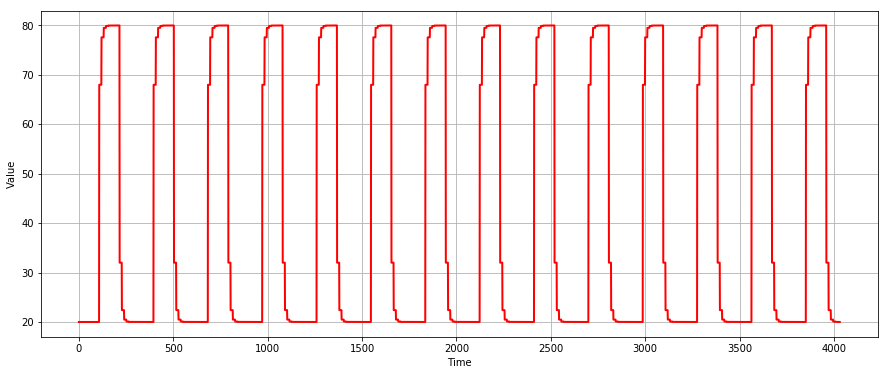

File path:  ../data/nab/artificialNoAnomaly/artificialNoAnomaly/art_daily_perfect_square_wave.csv


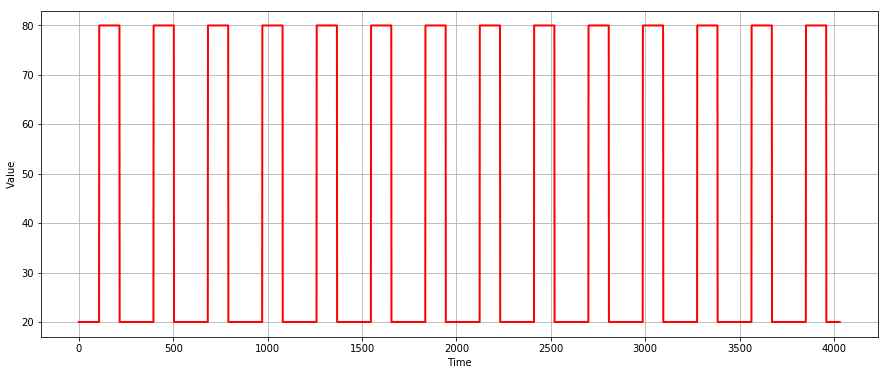

File path:  ../data/nab/artificialNoAnomaly/artificialNoAnomaly/art_daily_small_noise.csv


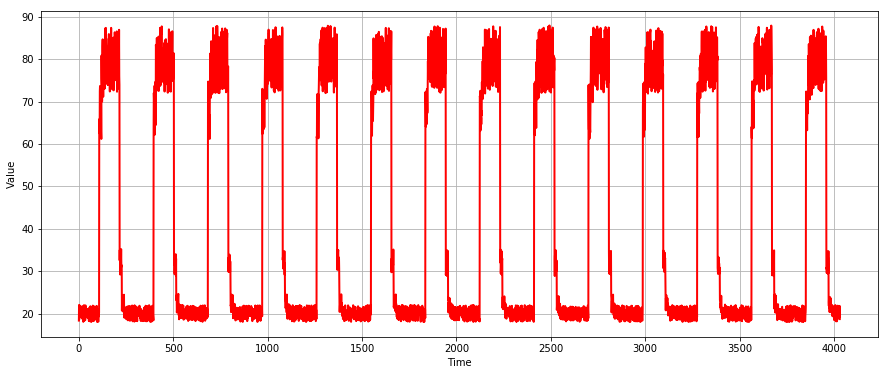

File path:  ../data/nab/artificialNoAnomaly/artificialNoAnomaly/art_flatline.csv


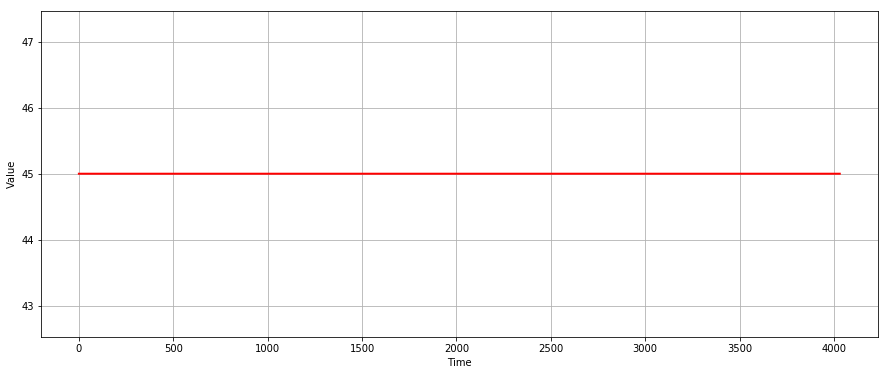

File path:  ../data/nab/artificialNoAnomaly/artificialNoAnomaly/art_noisy.csv


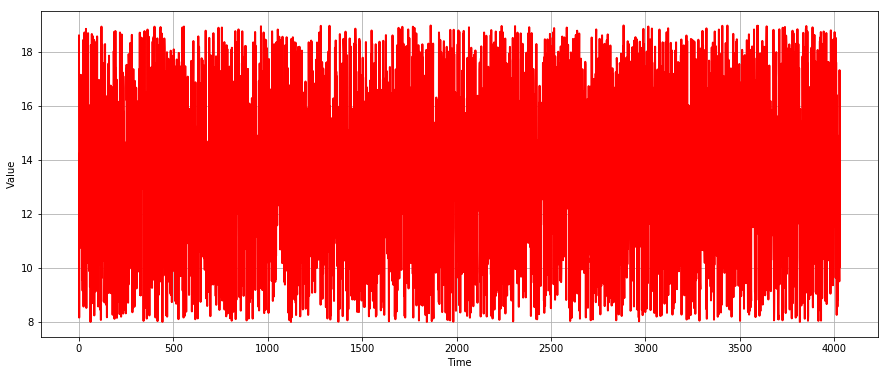

File path:  ../data/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_flatmiddle.csv


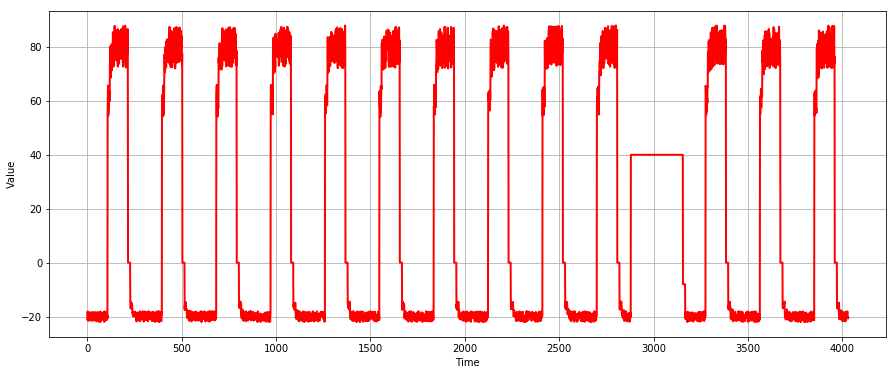

File path:  ../data/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsdown.csv


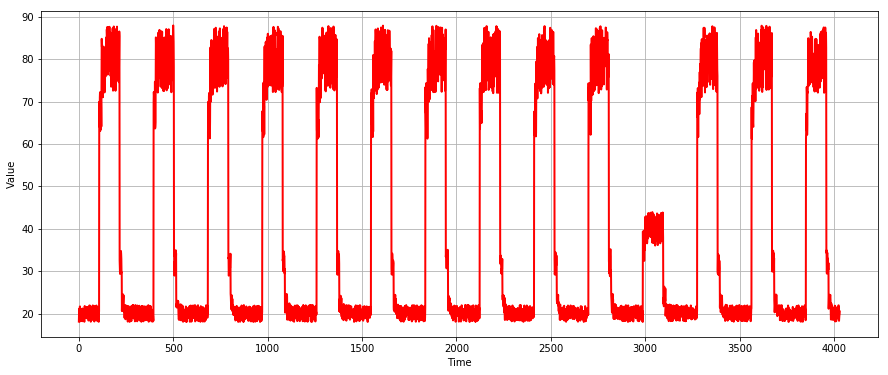

File path:  ../data/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsup.csv


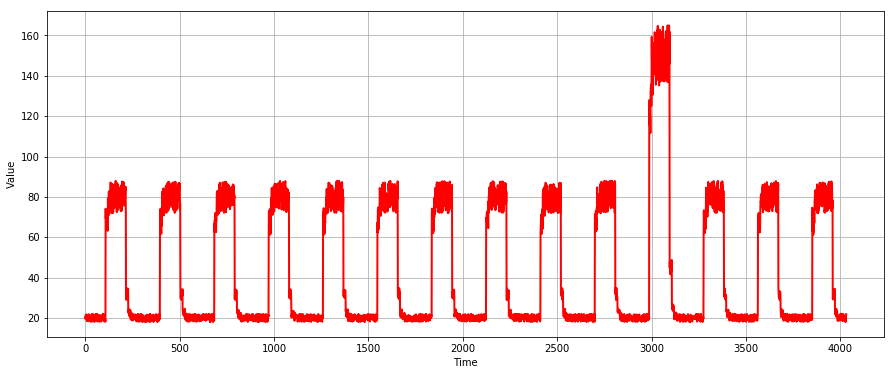

File path:  ../data/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_nojump.csv


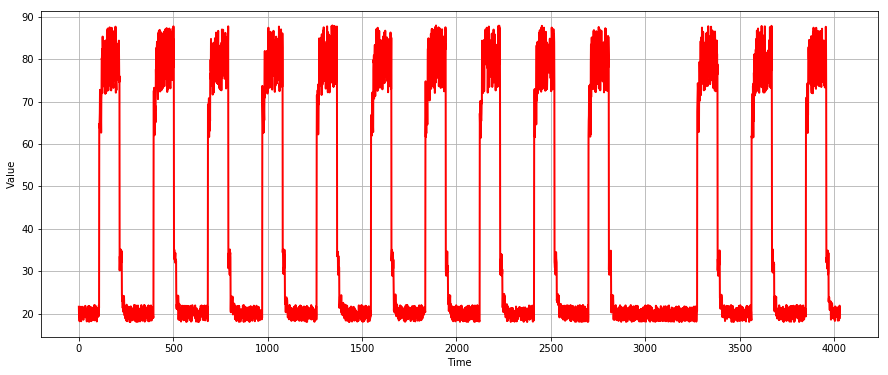

File path:  ../data/nab/artificialWithAnomaly/artificialWithAnomaly/art_increase_spike_density.csv


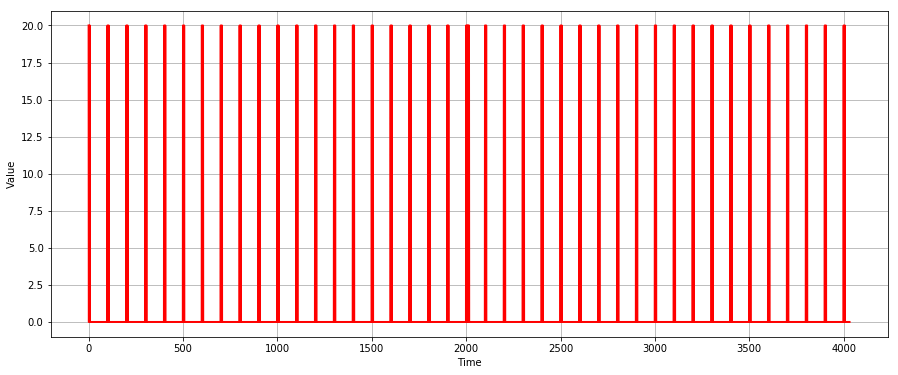

File path:  ../data/nab/artificialWithAnomaly/artificialWithAnomaly/art_load_balancer_spikes.csv


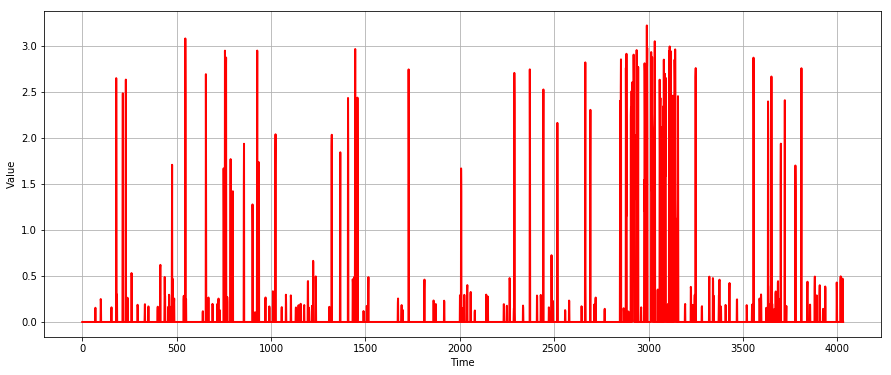

File path:  ../data/nab/realAdExchange/realAdExchange/exchange-2_cpc_results.csv


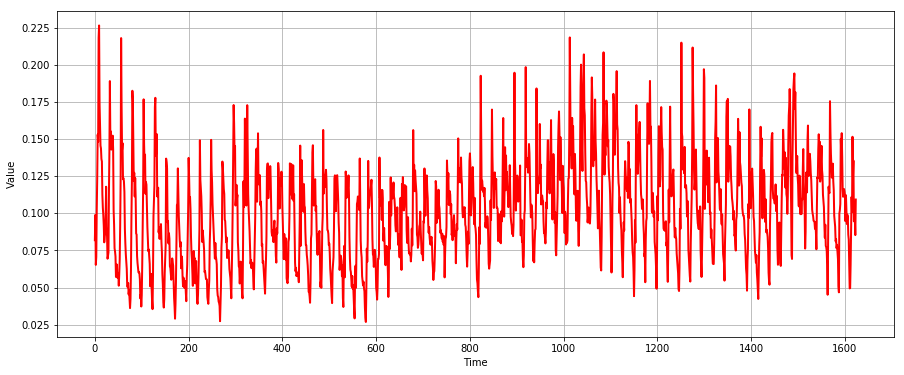

File path:  ../data/nab/realAdExchange/realAdExchange/exchange-2_cpm_results.csv


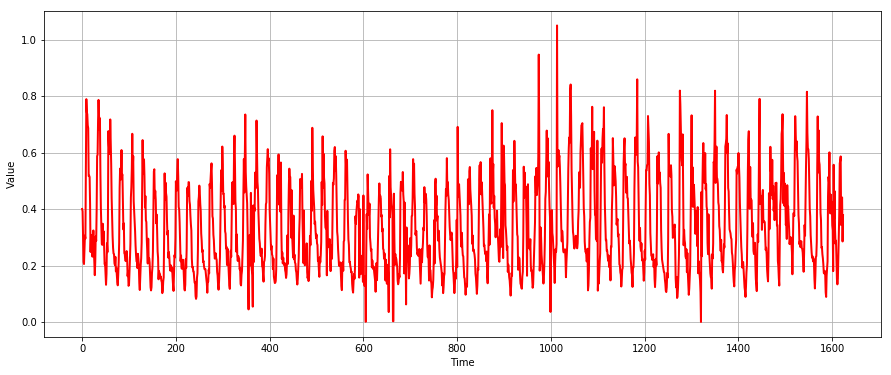

File path:  ../data/nab/realAdExchange/realAdExchange/exchange-3_cpc_results.csv


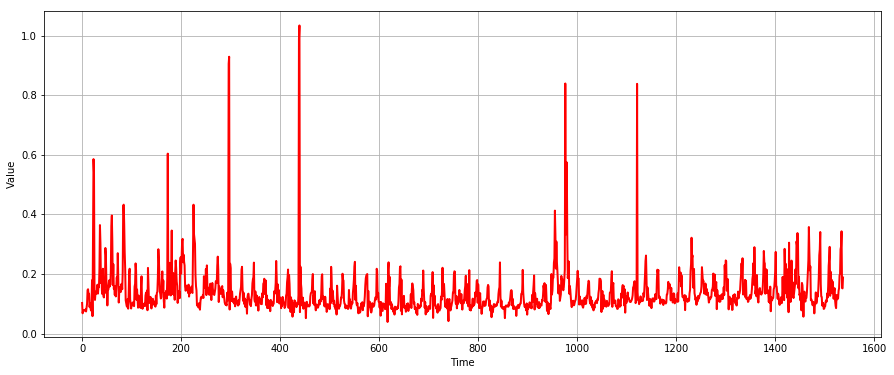

File path:  ../data/nab/realAdExchange/realAdExchange/exchange-3_cpm_results.csv


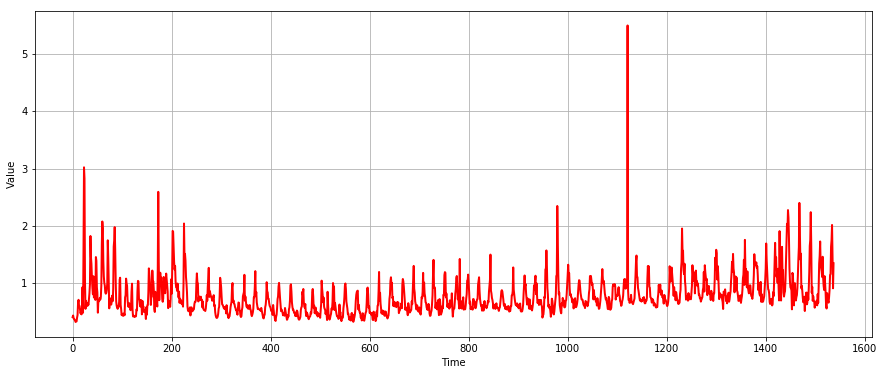

File path:  ../data/nab/realAdExchange/realAdExchange/exchange-4_cpc_results.csv


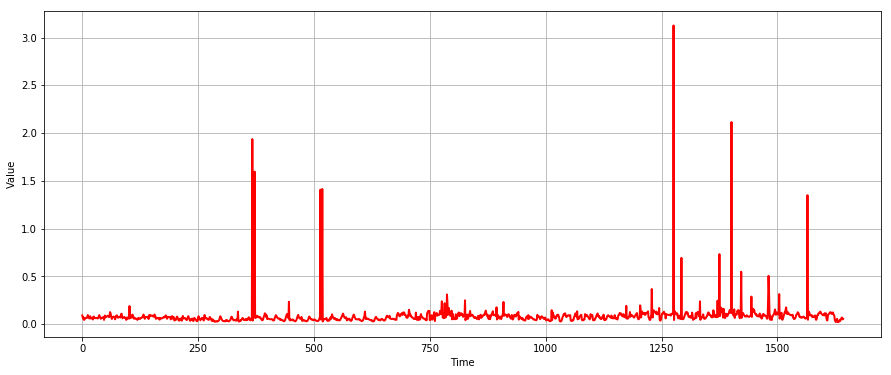

File path:  ../data/nab/realAdExchange/realAdExchange/exchange-4_cpm_results.csv


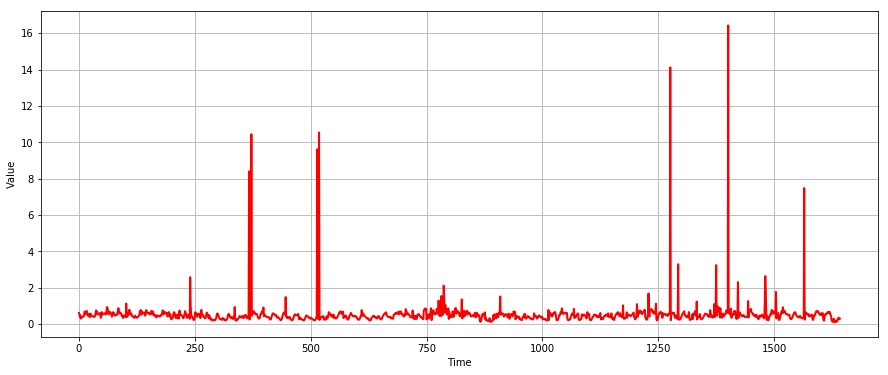

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv


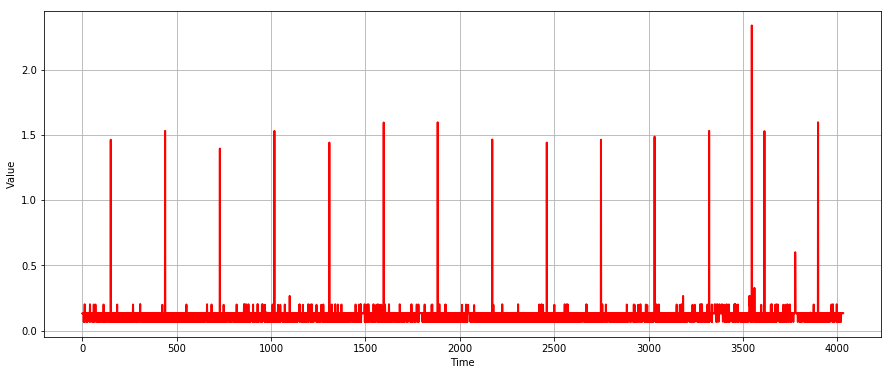

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_53ea38.csv


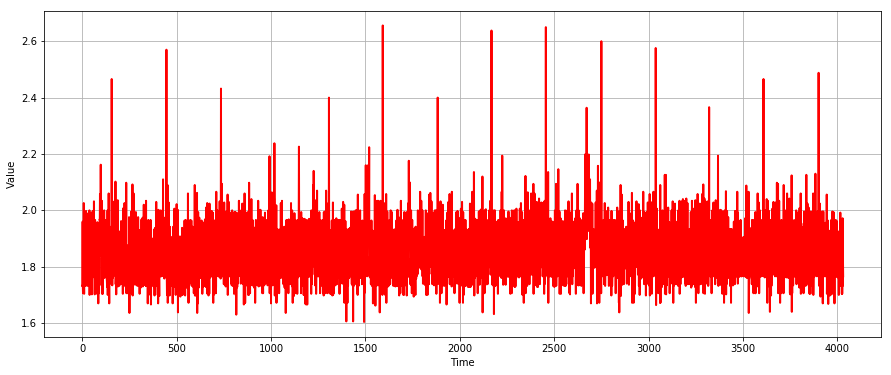

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv


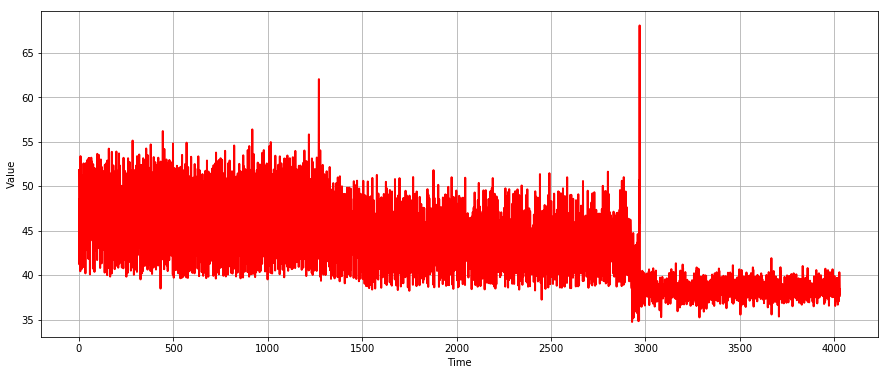

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_77c1ca.csv


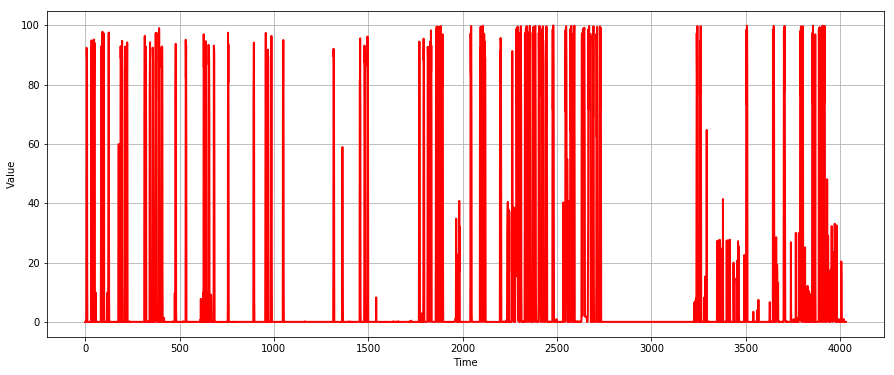

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_825cc2.csv


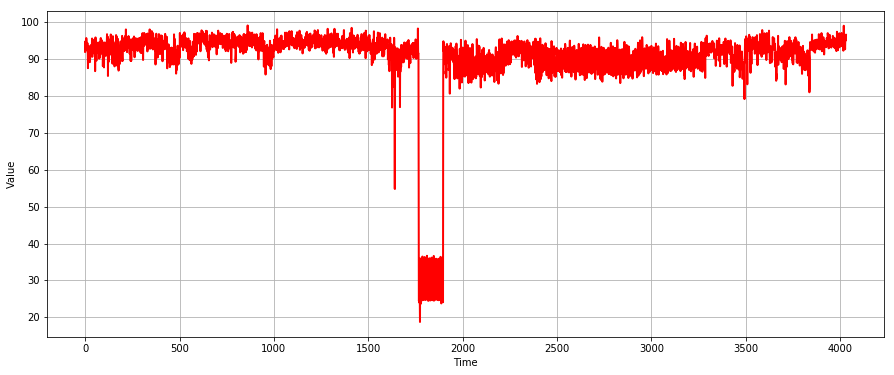

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_ac20cd.csv


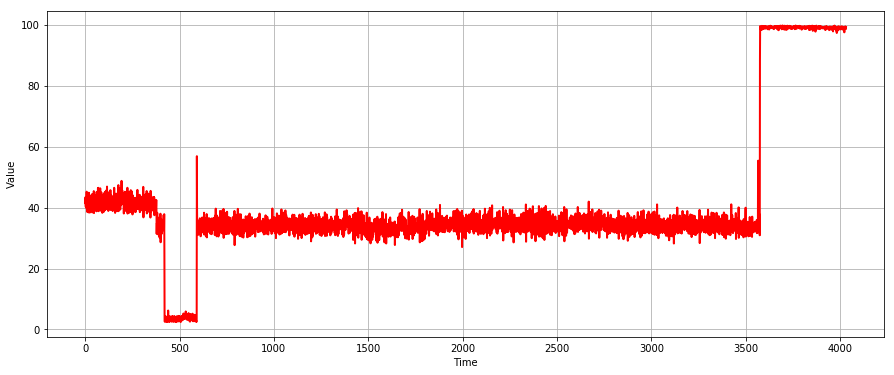

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_c6585a.csv


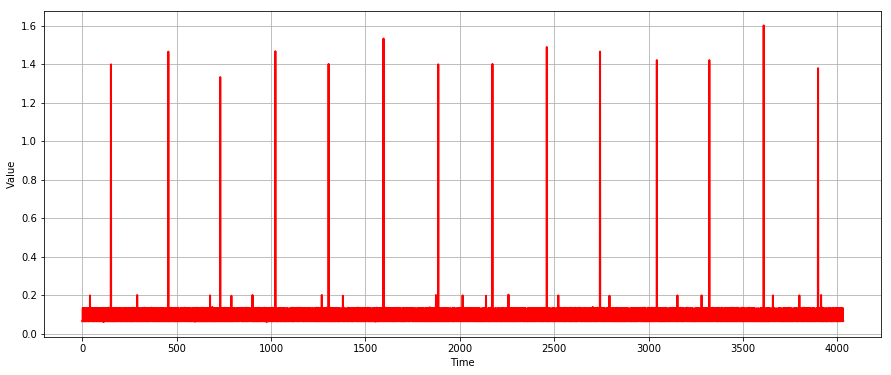

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_fe7f93.csv


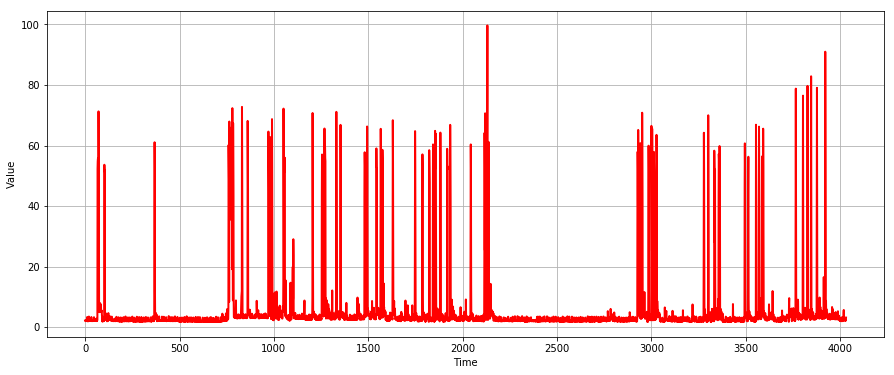

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_disk_write_bytes_1ef3de.csv


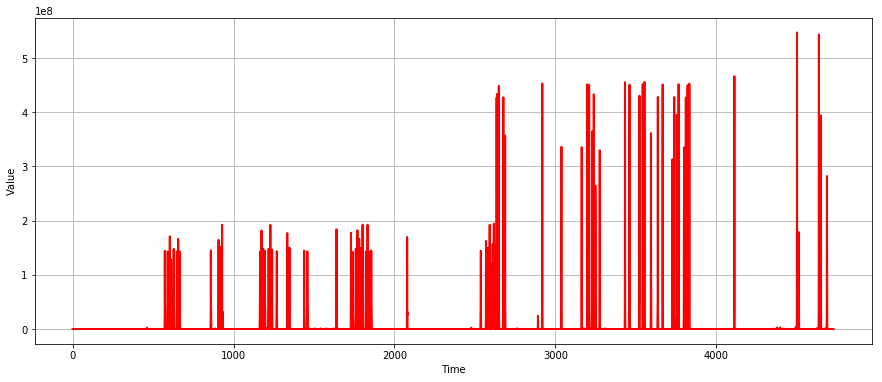

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_disk_write_bytes_c0d644.csv


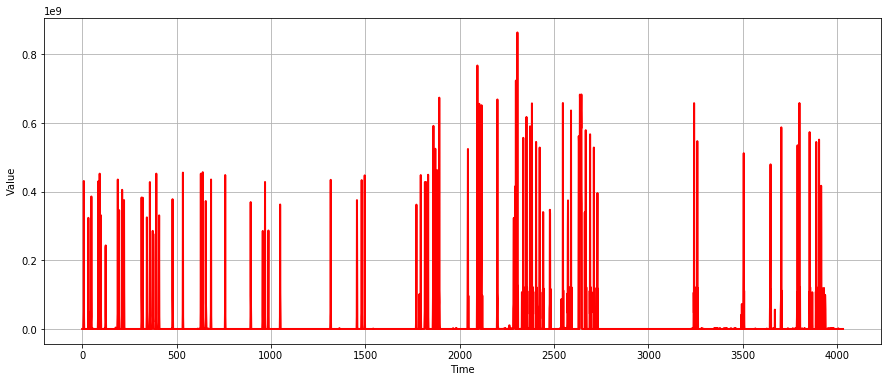

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_network_in_257a54.csv


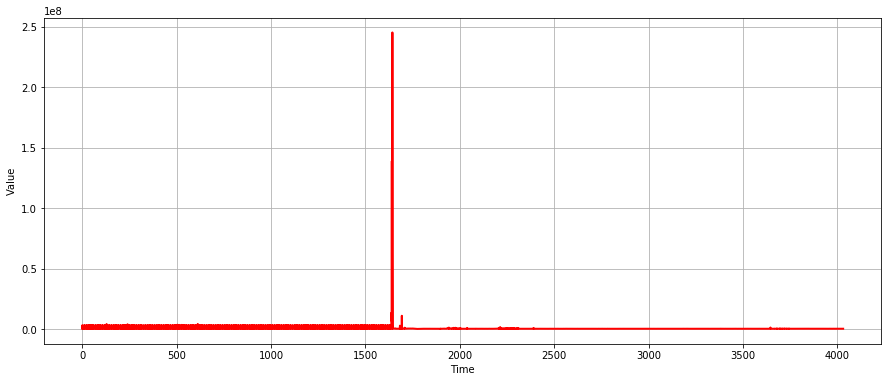

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_network_in_5abac7.csv


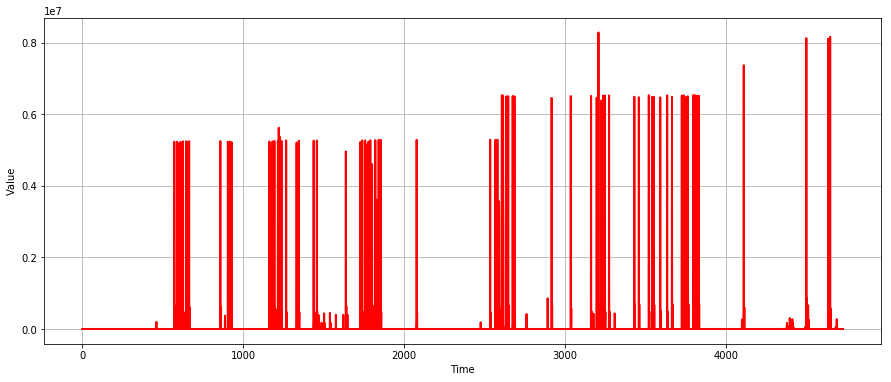

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/elb_request_count_8c0756.csv


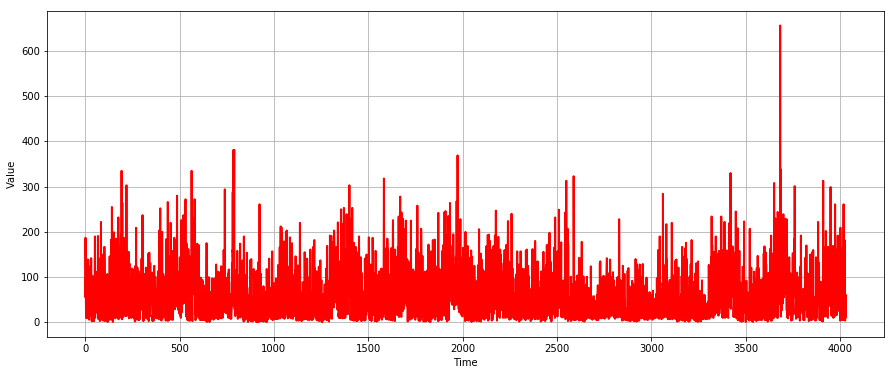

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/grok_asg_anomaly.csv


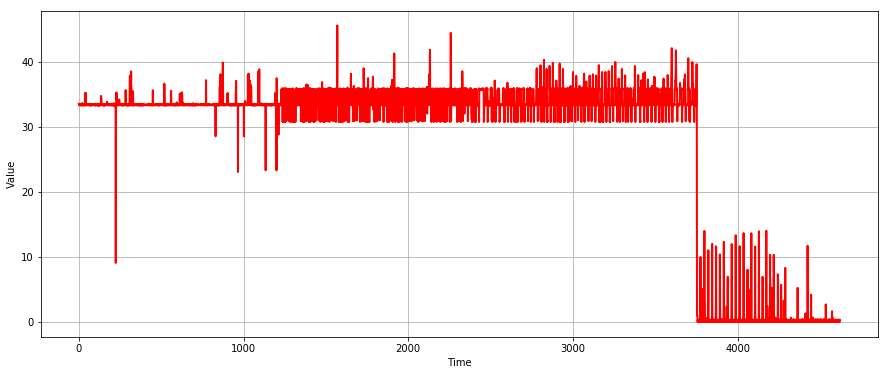

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/iio_us-east-1_i-a2eb1cd9_NetworkIn.csv


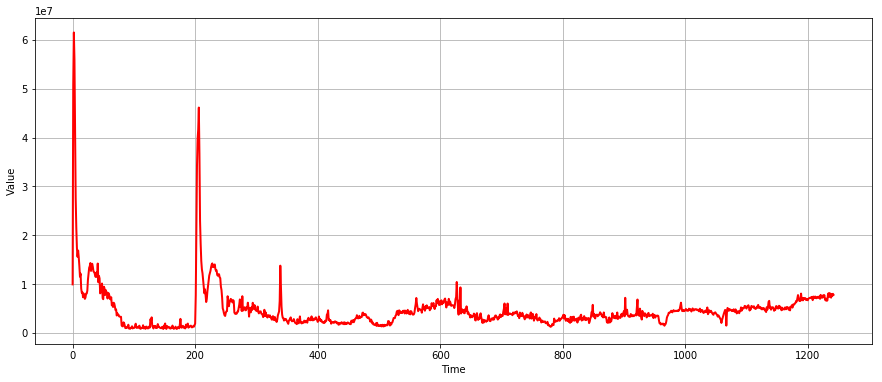

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/rds_cpu_utilization_cc0c53.csv


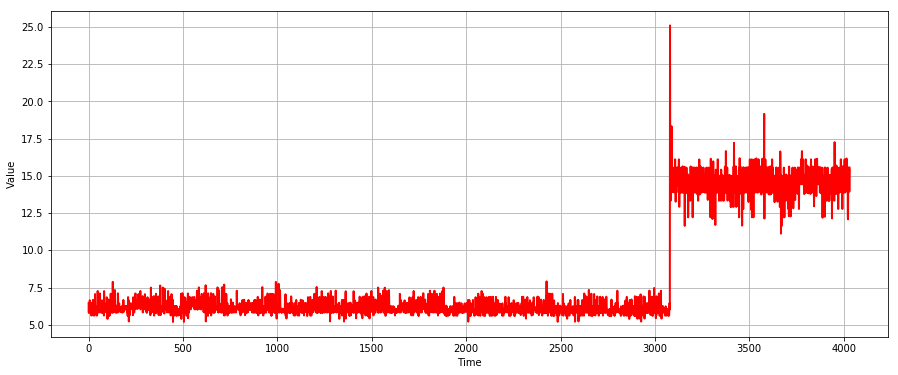

File path:  ../data/nab/realAWSCloudwatch/realAWSCloudwatch/rds_cpu_utilization_e47b3b.csv


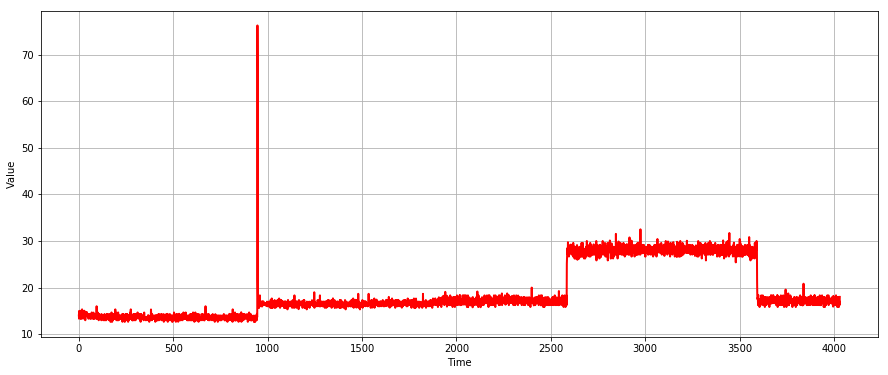

File path:  ../data/nab/realKnownCause/realKnownCause/ambient_temperature_system_failure.csv


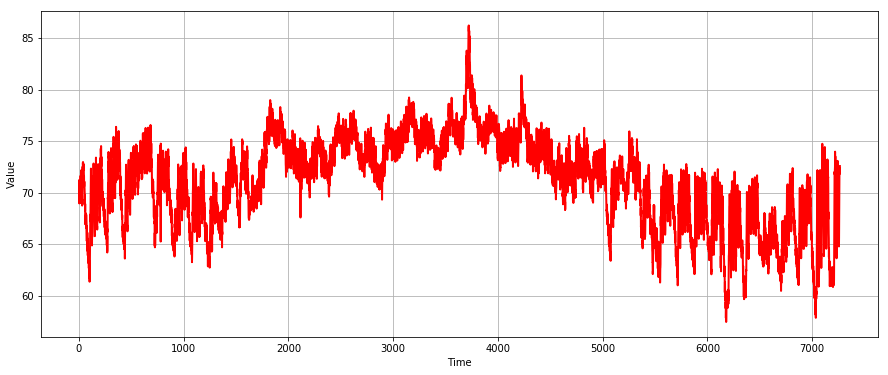

File path:  ../data/nab/realKnownCause/realKnownCause/cpu_utilization_asg_misconfiguration.csv


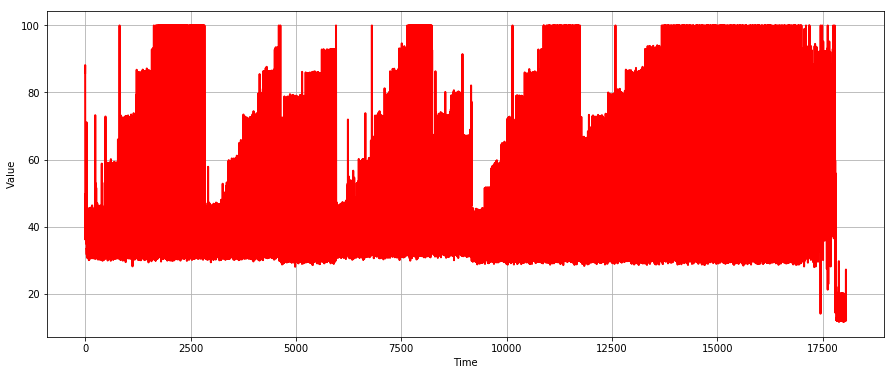

File path:  ../data/nab/realKnownCause/realKnownCause/ec2_request_latency_system_failure.csv


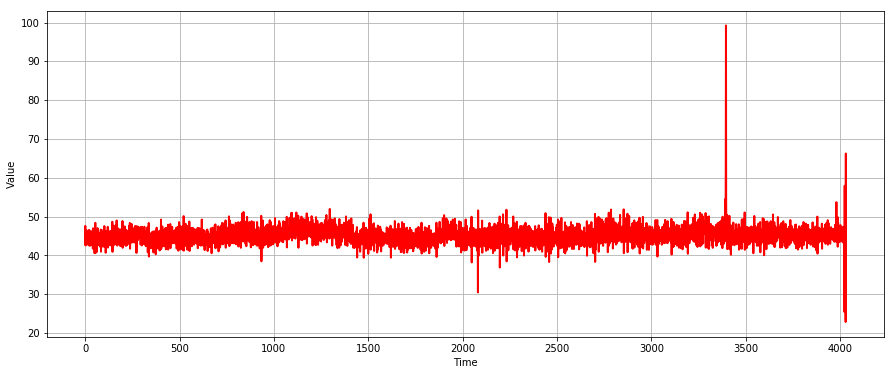

File path:  ../data/nab/realKnownCause/realKnownCause/machine_temperature_system_failure.csv


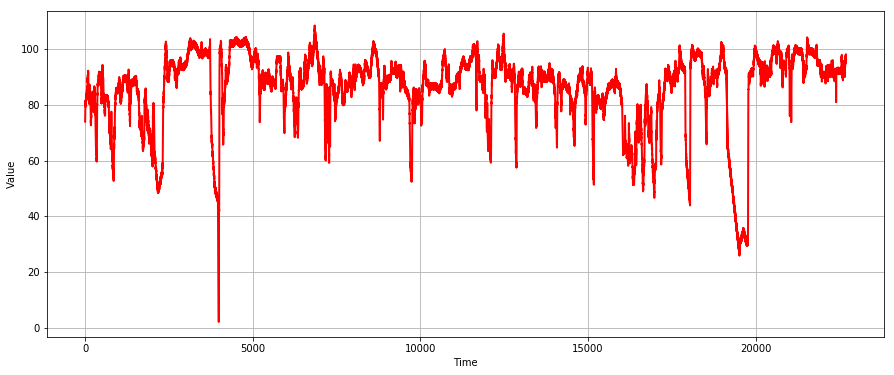

File path:  ../data/nab/realKnownCause/realKnownCause/nyc_taxi.csv


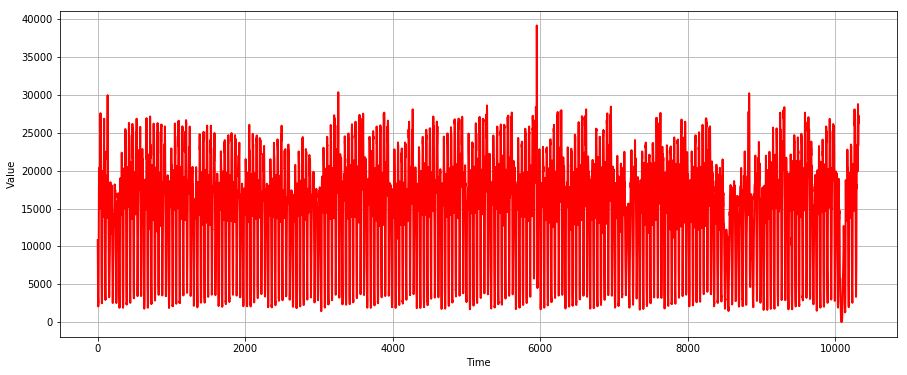

File path:  ../data/nab/realKnownCause/realKnownCause/rogue_agent_key_hold.csv


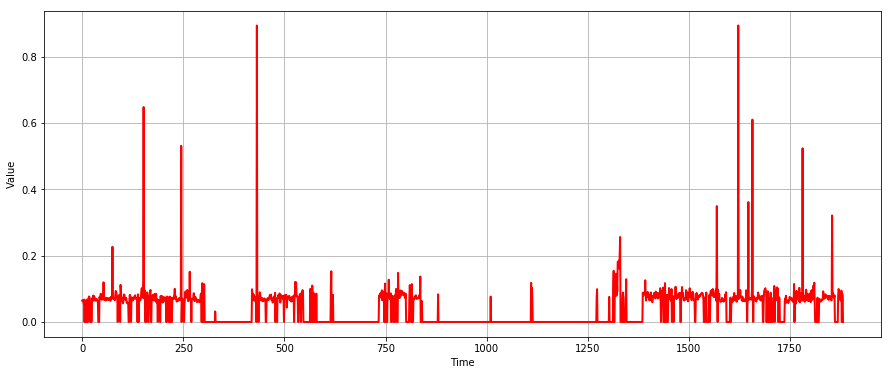

File path:  ../data/nab/realKnownCause/realKnownCause/rogue_agent_key_updown.csv


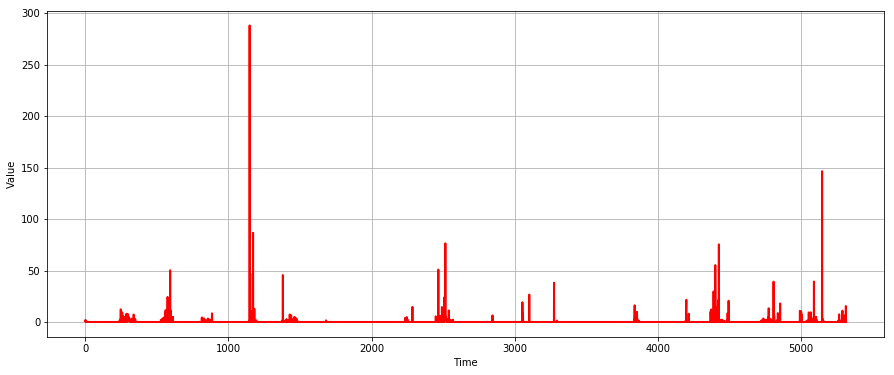

File path:  ../data/nab/realTraffic/realTraffic/.DS_Store
Can not read file:  ../data/nab/realTraffic/realTraffic/.DS_Store
File path:  ../data/nab/realTraffic/realTraffic/occupancy_6005.csv


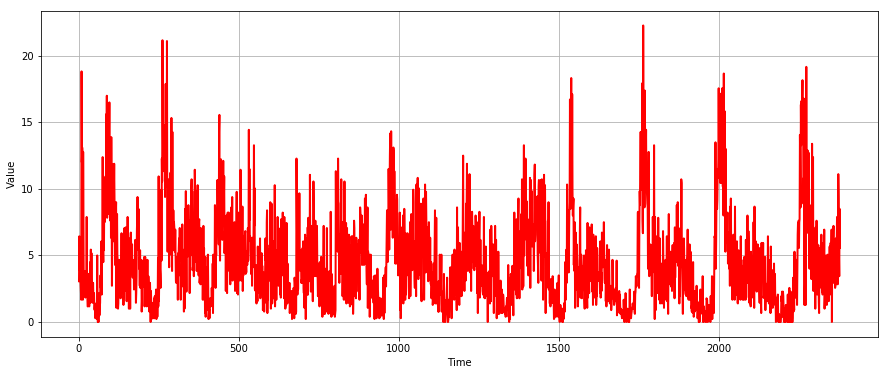

File path:  ../data/nab/realTraffic/realTraffic/occupancy_t4013.csv


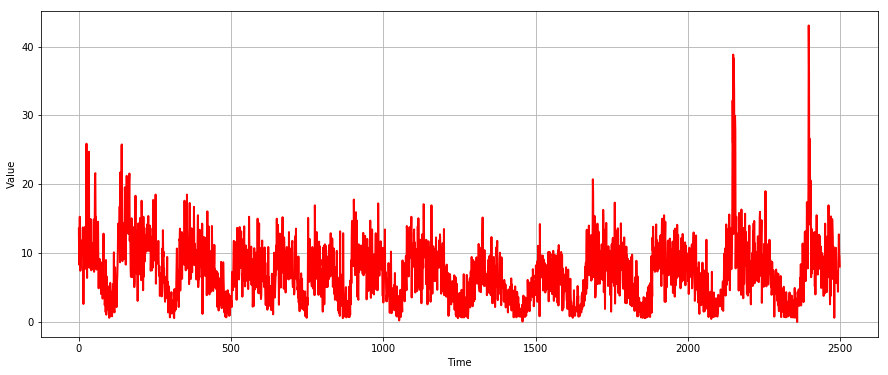

File path:  ../data/nab/realTraffic/realTraffic/speed_6005.csv


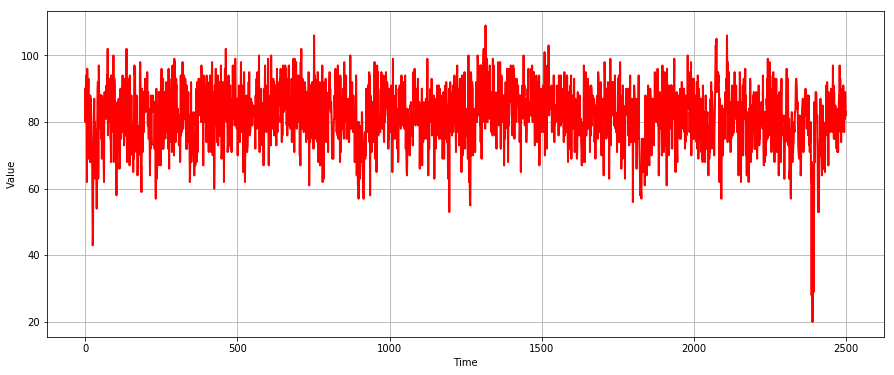

File path:  ../data/nab/realTraffic/realTraffic/speed_7578.csv


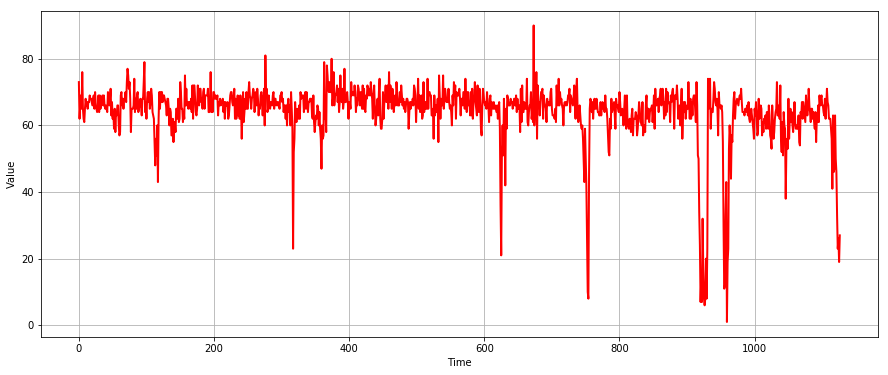

File path:  ../data/nab/realTraffic/realTraffic/speed_t4013.csv


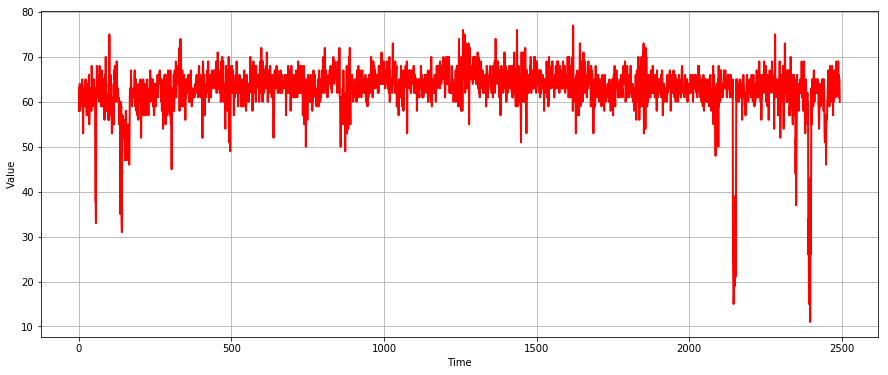

File path:  ../data/nab/realTraffic/realTraffic/TravelTime_387.csv


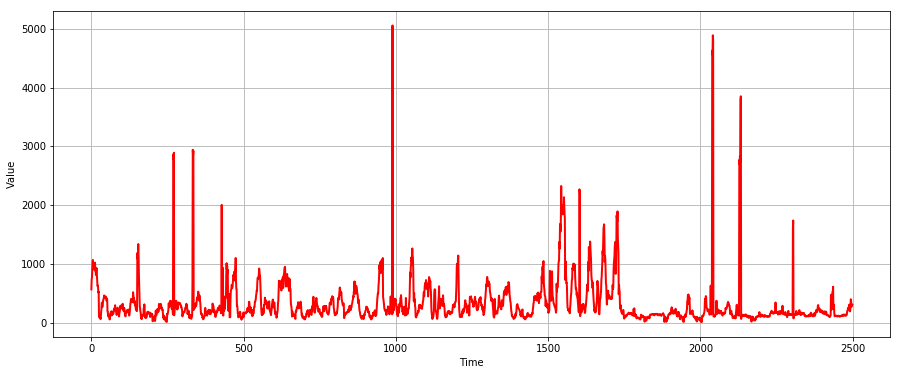

File path:  ../data/nab/realTraffic/realTraffic/TravelTime_451.csv


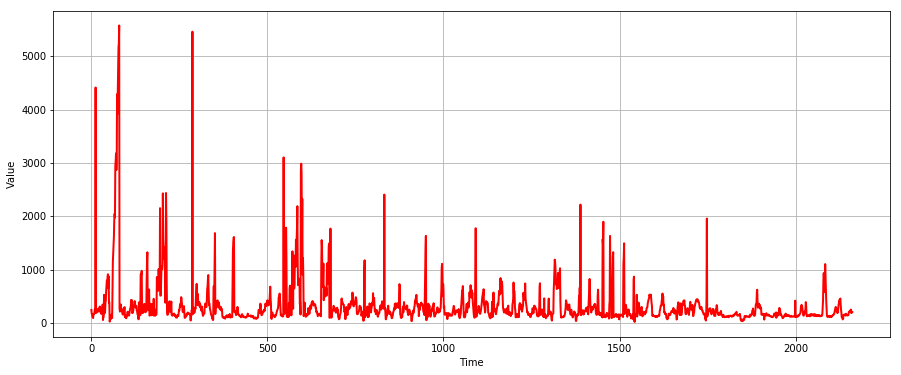

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_AAPL.csv


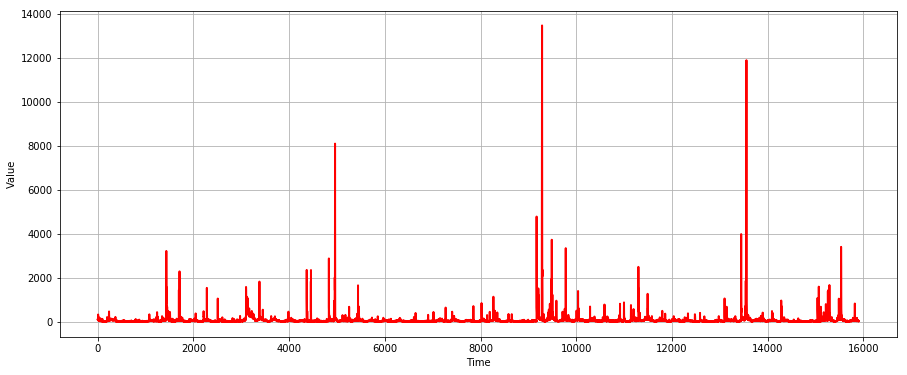

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_AMZN.csv


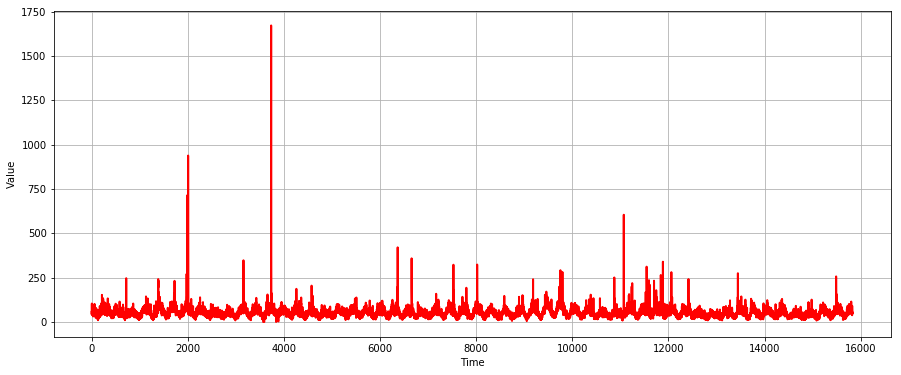

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_CRM.csv


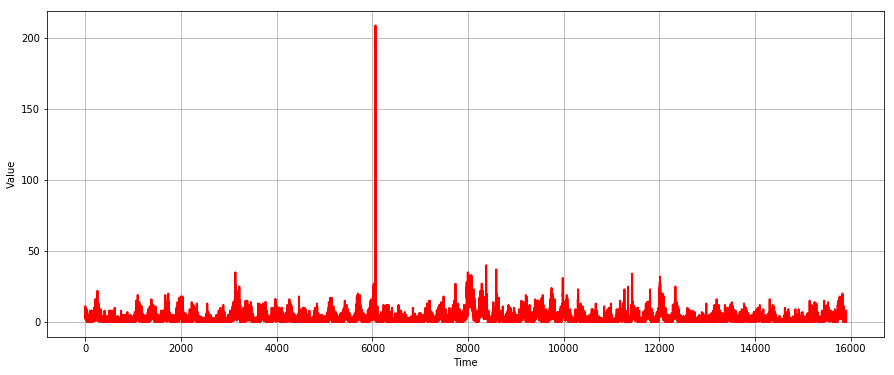

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_CVS.csv


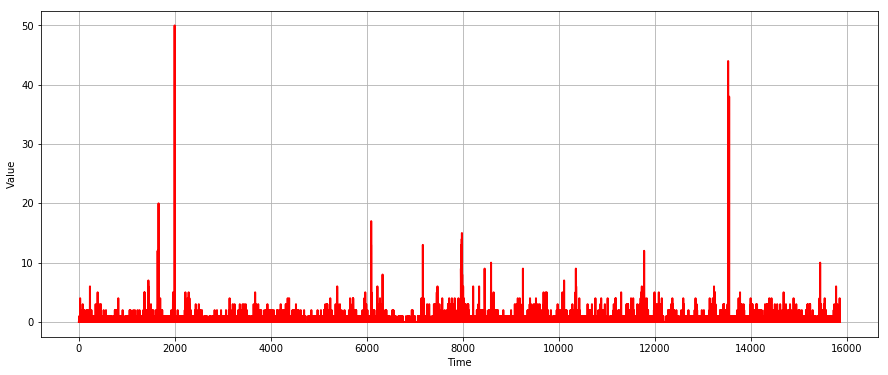

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_FB.csv


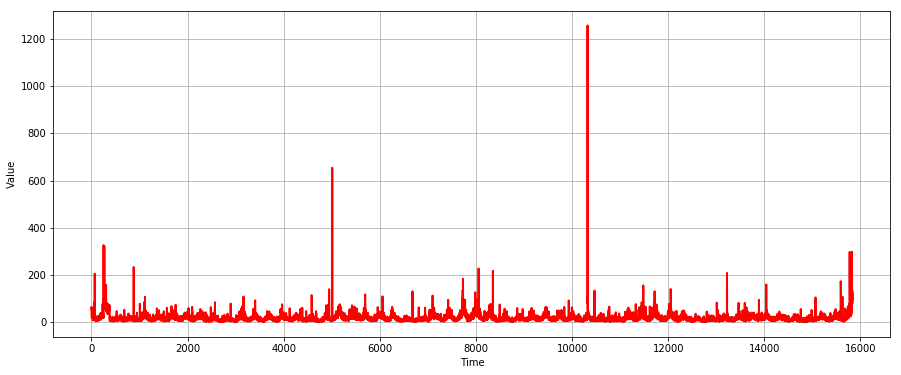

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_GOOG.csv


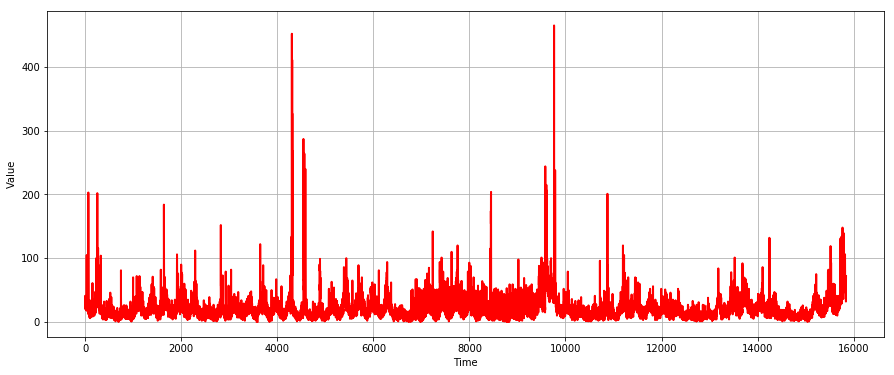

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_IBM.csv


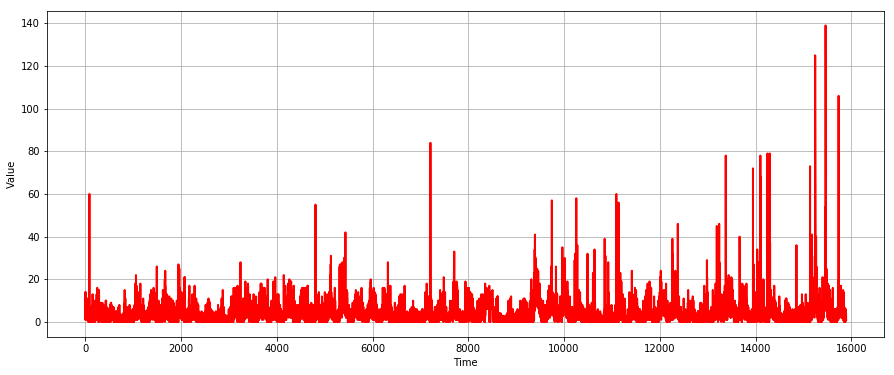

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_KO.csv


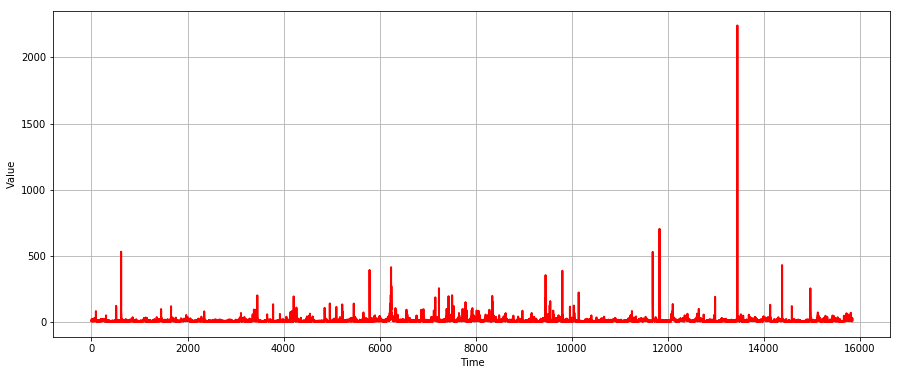

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_PFE.csv


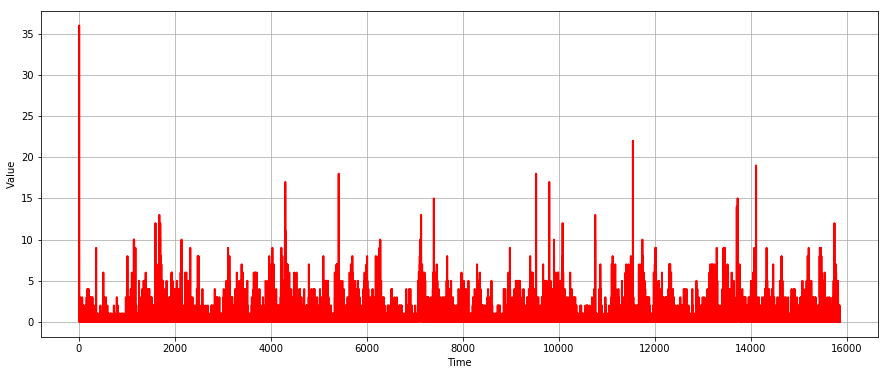

File path:  ../data/nab/realTweets/realTweets/Twitter_volume_UPS.csv


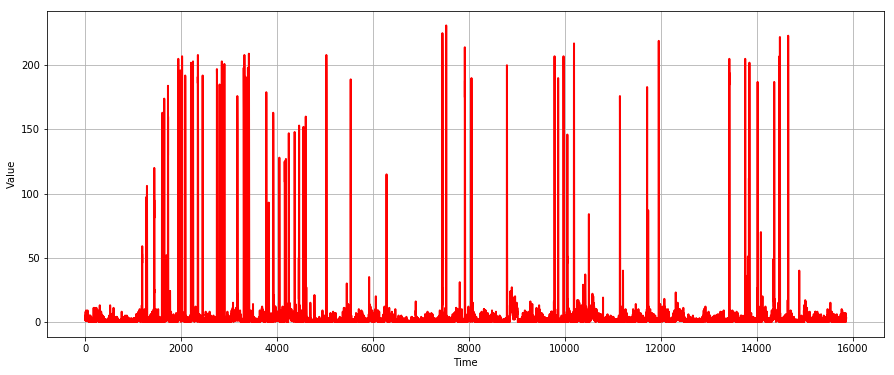

In [3]:
for adir in os.listdir("../data/nab/"):
    apath = "../data/nab/"+adir+"/"+adir+"/"
    if os.path.isdir(apath):
        for afile in os.listdir(apath):
            
            try:
                print("File path: ", apath+afile)
                data = pd.read_csv(apath+afile)
                data_display(data['value'], "")
            except:
                print("Can not read file: ", apath+afile)

# Select the coolest time series

In [4]:
data = pd.read_csv('../data/nab/realAWSCloudwatch/realAWSCloudwatch/ec2_cpu_utilization_5f5533.csv')

In [5]:
data.head()

timestamp   value
0  2014-02-14 14:27:00  51.846
1  2014-02-14 14:32:00  44.508
2  2014-02-14 14:37:00  41.244
3  2014-02-14 14:42:00  48.568
4  2014-02-14 14:47:00  46.714

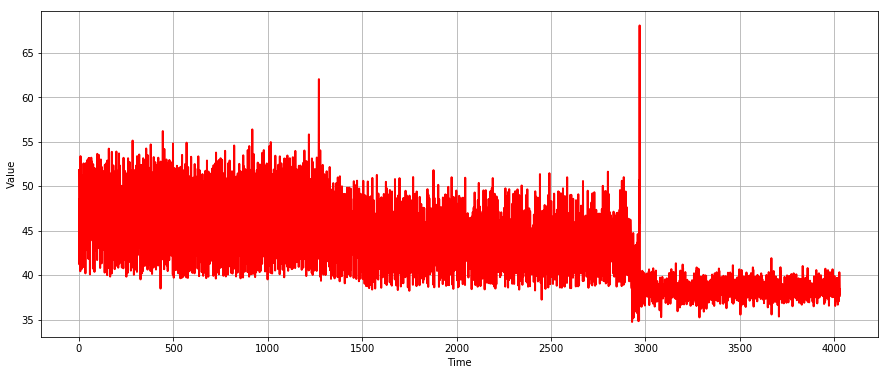

In [6]:
data_display(data['value'].values)

# Anomalies detection

In [7]:
WINDOW = 50

y = data['value'].values

y_ma = pd.rolling_mean(y, WINDOW)[WINDOW:]
y = y[WINDOW:]

In [8]:
from sklearn.cluster import DBSCAN, MeanShift, KMeans

#cl = DBSCAN(eps=0.5, min_samples=100)
cl = KMeans(n_clusters=3)
labels = cl.fit_predict(y_ma.reshape(-1, 1))

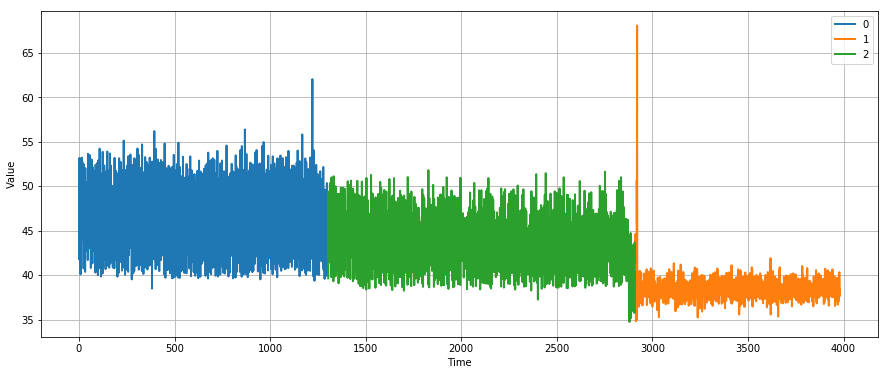

In [9]:
plt.figure(figsize=(15, 6))

for alab in np.unique(labels):
    plt.plot(np.arange(len(y))[labels == alab], y[labels == alab], linewidth=2, label=str(alab))

plt.ylabel('Value')
plt.xlabel('Time')
plt.legend(loc='best')
plt.grid(b=1)
plt.show()

# Задание #1

Найдите аномалии в выбранном временно ряду. Используйте любые методы и алгоритмы.